In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [2]:
years = 10
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 365*years)

In [4]:
tickers = ['AAPL','META','GOOGL','NVDA','C','MSFT','JNJ','JPM','XOM','AMD']

In [5]:
adj_close_df=yf.download(tickers,start=startDate,end=endDate)['Adj Close']
adj_close_df.head()

[*********************100%%**********************]  10 of 10 completed


Ticker,AAPL,AMD,C,GOOGL,JNJ,JPM,META,MSFT,NVDA,XOM
Date,,,,,,,,,,
2014-11-28,26.485037,2.79,41.312035,27.386187,82.800697,45.637470,77.466751,41.054108,0.503339,58.561352
2014-12-01,25.625441,2.67,40.837463,26.915854,82.632423,45.516087,74.874565,41.749645,0.493978,59.732075
2014-12-02,25.527454,2.68,41.610569,26.862984,82.999573,46.335384,75.233482,41.612263,0.494698,60.922195
2014-12-03,25.816957,2.74,42.261211,26.782183,82.395294,46.684341,74.655220,41.285946,0.507420,61.413742
2014-12-04,25.718971,2.69,42.238247,27.061991,82.272919,46.562969,75.014145,41.938568,0.502859,61.038612


In [6]:
adj_close_df.tail()

Ticker,AAPL,AMD,C,GOOGL,JNJ,JPM,META,MSFT,NVDA,XOM
Date,,,,,,,,,,
2024-11-18,228.020004,138.929993,69.000000,175.300003,154.770004,245.029999,554.400024,414.929474,140.149994,120.309998
2024-11-19,228.279999,139.389999,68.599998,178.119995,153.000000,243.089996,561.090027,416.955414,147.009995,118.629997
2024-11-20,229.000000,137.600006,68.279999,175.979996,153.110001,240.779999,565.520020,414.659973,145.889999,120.320000
2024-11-21,228.520004,137.490005,68.949997,167.630005,155.500000,244.759995,563.090027,412.869995,146.669998,121.930000
2024-11-22,229.869995,138.350006,69.839996,164.759995,155.169998,248.550003,559.140015,417.000000,141.949997,121.790001


In [7]:
log_returns=np.log(adj_close_df/adj_close_df.shift(1))
log_returns=log_returns.dropna()
log_returns.head()

Ticker,AAPL,AMD,C,GOOGL,JNJ,JPM,META,MSFT,NVDA,XOM
Date,,,,,,,,,,
2014-12-01,-0.032994,-0.043963,-0.011554,-0.017323,-0.002034,-0.002663,-0.034035,0.016800,-0.018773,0.019794
2014-12-02,-0.003831,0.003738,0.018754,-0.001966,0.004433,0.017840,0.004782,-0.003296,0.001457,0.019728
2014-12-03,0.011277,0.022141,0.015515,-0.003012,-0.007307,0.007503,-0.007716,-0.007873,0.025390,0.008036
2014-12-04,-0.003803,-0.018417,-0.000544,0.010393,-0.001486,-0.002603,0.004796,0.015684,-0.009028,-0.006127
2014-12-05,-0.004252,-0.011215,0.016179,-0.027088,0.008793,0.021277,0.014776,-0.008637,0.005712,-0.005845


In [8]:
import edhec_risk_kit_205 as erk

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.216822,0.235493,-0.648337,12.632195,0.023328,0.036215,0.819456,-0.386729


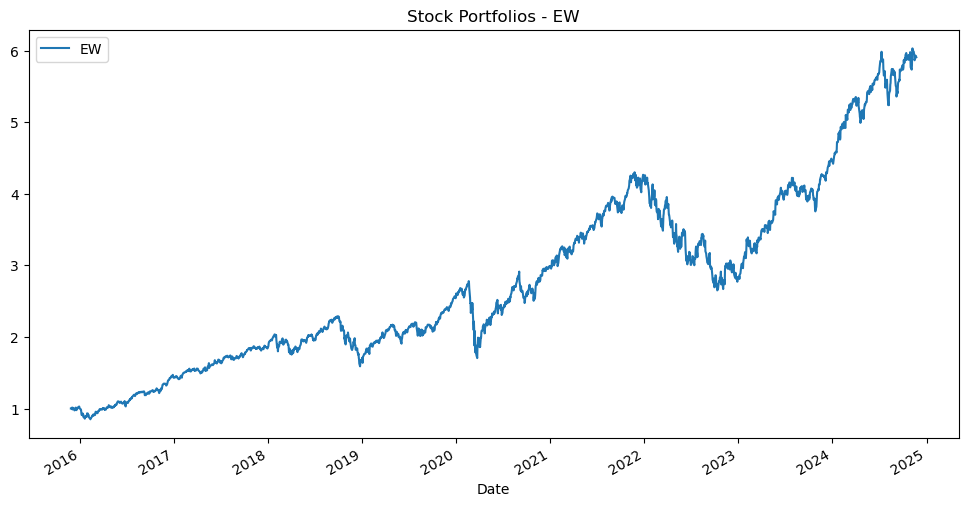

In [9]:
ewr = erk.backtest_ws(log_returns, estimation_window=250, weighting=erk.weight_ew)
btr = pd.DataFrame({"EW": ewr})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios - EW")
erk.summary_stats(btr.dropna())

In [10]:
def sample_cov(r, **kwargs):
    """
    Returns the sample covariance of the supplied returns
    """
    return r.cov()

def weight_gmv(r, cov_estimator=sample_cov, **kwargs):
    """
    Produces the weights of the GMV portfolio given a covariance matrix of the returns 
    """
    est_cov = cov_estimator(r, **kwargs)
    return erk.gmv(est_cov)


,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
EW,0.216822,0.235493,-0.648337,12.632195,0.023328,0.036215,0.819456,-0.386729
GMV-Sample,0.078042,0.163288,-0.365700,13.561757,0.015476,0.025326,0.348509,-0.363634


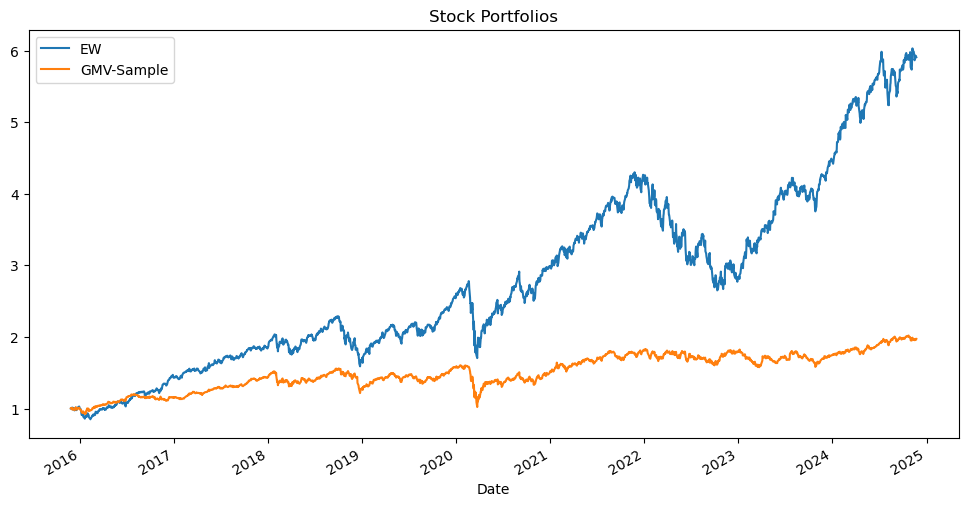

In [11]:
mv_s_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=sample_cov)
btr = pd.DataFrame({"EW": ewr, "GMV-Sample": mv_s_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())

In [12]:
#import statsmodels.stats.moment_helpers as mh
def cc_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the Elton/Gruber Constant Correlation model
    """
    rhos = r.corr()
    n = rhos.shape[0]
    # this is a symmetric matrix with diagonals all 1 - so the mean correlation is ...
    rho_bar = (rhos.values.sum()-n)/(n*(n-1))
    ccor = np.full_like(rhos, rho_bar)
    np.fill_diagonal(ccor, 1.)
    sd = r.std()
    ccov = ccor * np.outer(sd, sd)
#     mh.corr2cov(ccor, sd)
    return pd.DataFrame(ccov, index=r.columns, columns=r.columns)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-Sample,0.078042,0.163288,-0.3657,13.561757,0.015476,0.025326,0.348509,-0.363634
GMV-CC,0.070063,0.167709,-0.2528,13.243933,0.015673,0.025731,0.292672,-0.363533


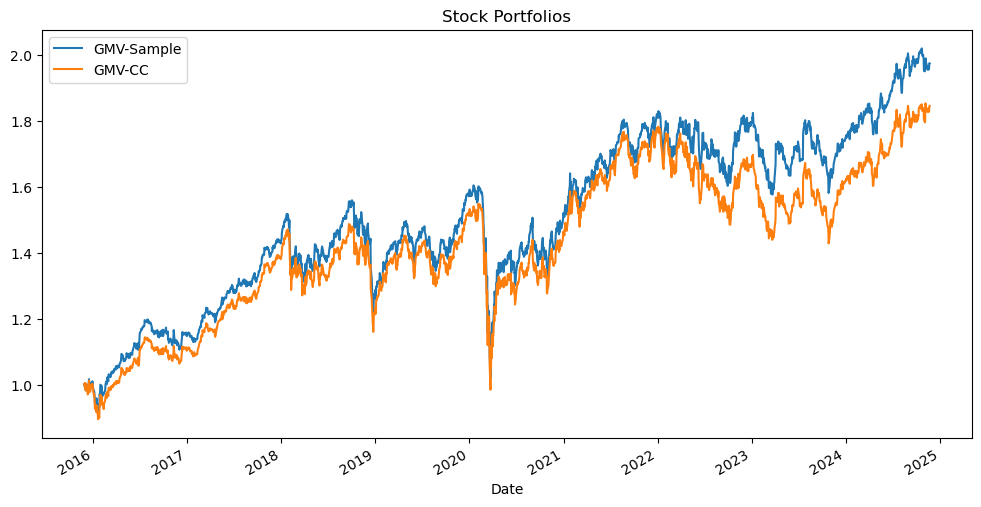

In [13]:
mv_cc_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=cc_cov)
btr = pd.DataFrame({"GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())

In [14]:
from sklearn.decomposition import FactorAnalysis

In [17]:
#Define factor-based covariance estimate
def factor_cov(r, **kwargs):
    """
    Estimates a covariance matrix by using the factor model
    """
    n_factors = 3
    fa = FactorAnalysis(n_components = n_factors)
    fa.fit(r) #Fit the Factor analysis model
    
    #factor loadings
    factor_loadings = fa.components_.T #transpose for dimensional matching
    
    #factor covariance
    factor_covariance = np.dot(factor_loadings,factor_loadings.T)+np.diag(fa.noise_variance_)
    return pd.DataFrame(factor_covariance, index=r.columns, columns=r.columns)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-Sample,0.078042,0.163288,-0.365700,13.561757,0.015476,0.025326,0.348509,-0.363634
GMV-CC,0.070063,0.167709,-0.252800,13.243933,0.015673,0.025731,0.292672,-0.363533
GMV-Factor,0.076918,0.163925,-0.371639,13.747018,0.015519,0.025246,0.340431,-0.367638


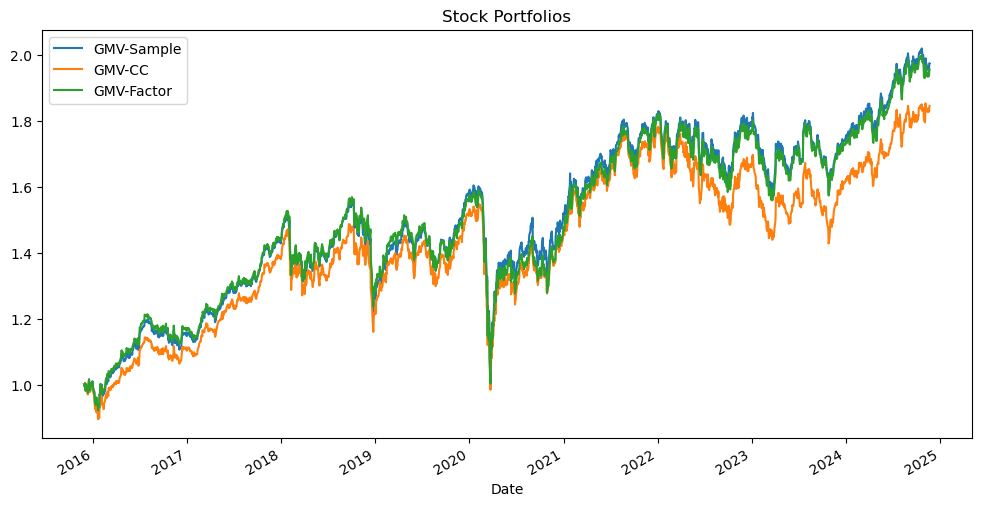

In [18]:
mv_factor_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=factor_cov)
btr = pd.DataFrame({"GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r,"GMV-Factor": mv_factor_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())

In [19]:
def riskmetrics_cov(returns, lambda_=0.94):
    """
    Compute the RiskMetrics (EWMA) covariance matrix for asset returns.
    
    Parameters:
    - returns (DataFrame): DataFrame of asset returns (rows: time, columns: assets).
    - lambda_ (float): Decay factor (default: 0.94, as recommended by RiskMetrics).
    
    Returns:
    - cov_matrix (ndarray): EWMA covariance matrix at the end of the dataset.
    """
    # Initialize variables
    n_assets = returns.shape[1]
    cov_matrix = np.zeros((n_assets, n_assets))
    
    # Compute EWMA covariance matrix
    for t in range(1, len(returns)):
        current_returns = returns.iloc[t].values.reshape(-1, 1)
        previous_cov_matrix = cov_matrix
        outer_product = current_returns @ current_returns.T
        
        cov_matrix = lambda_ * previous_cov_matrix + (1 - lambda_) * outer_product

    return cov_matrix

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic CVaR (5%),Sharpe Ratio,Max Drawdown
GMV-Sample,0.078042,0.163288,-0.365700,13.561757,0.015476,0.025326,0.348509,-0.363634
GMV-CC,0.070063,0.167709,-0.252800,13.243933,0.015673,0.025731,0.292672,-0.363533
GMV-Factor,0.076918,0.163925,-0.371639,13.747018,0.015519,0.025246,0.340431,-0.367638
GMV-Riskmetrics,0.099061,0.165920,-0.321135,13.043122,0.015635,0.025803,0.467187,-0.323393


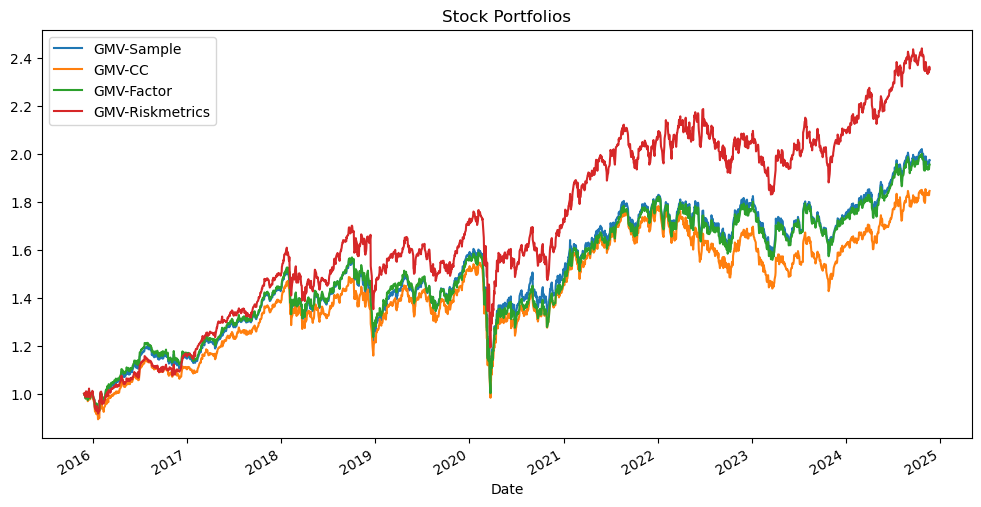

In [20]:
mv_ewma_r = erk.backtest_ws(log_returns, estimation_window=250, weighting=weight_gmv, cov_estimator=riskmetrics_cov)
btr = pd.DataFrame({"GMV-Sample": mv_s_r, "GMV-CC": mv_cc_r,"GMV-Factor": mv_factor_r,"GMV-Riskmetrics": mv_ewma_r})
(1+btr).cumprod().plot(figsize=(12,6), title="Stock Portfolios")
erk.summary_stats(btr.dropna())